<a href="https://colab.research.google.com/github/maitreyee-hue/1/blob/main/Tweet_sentiment_predication_final_project_4_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install lazypredict
!pip install tweet-preprocessor
!pip install -U pip setuptools wheel
!pip install spacy
nltk.download('stopwords')


distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages


True

In [3]:
import nltk

In [5]:
import pandas as pd
import string
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lazypredict.Supervised import LazyClassifier
import preprocessor as p
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 

#nlp = spacy.load('en_core_web_sm')
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
from google.colab import drive
drive.mount('/gddrive')

Mounted at /gddrive


In [7]:
# df = pd.read_csv('/gddrive/MyDrive/Colab Notebooks/Marathi_tweet_sentiment/covid19.csv')
df = pd.read_csv('/content/finaldemo.csv')

In [8]:
clean_data =df.iloc[:,0].apply(lambda x: p.clean(x))

In [9]:
# data clean methods
stopword=stopword+['brt','xfxfxcxe','xfxfxxvaccin']

def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    #after tweepy preprocessing the colon symbol left remain after    
    tweet = re.sub(r':', '', text_rc)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #filter using NLTK library append it to a string
    tokens = re.split('\W+', tweet)    # tokenization
    text = [word for word in tokens if word not in stopword]  # remove stopwords
    return text

In [10]:
df['clean_tweets'] = clean_data.apply(lambda x:clean_text(x))
df['clean_tweets']= df['clean_tweets'].apply(lambda x: ' '.join(x))

In [11]:
df

,VIDEO: Gulabrao Patil | Koronakalata not right Khadse-Mahajan tikatippani: Gulabrao Patil\n #GulabraoPatil # Corona ... https://t.co/iyKXsINMHU,clean_tweets
0,"Corona: Corona, but the new strain of origin a...",corona corona new strain origin amaravatituna ...
1,"Corona Vaccine Update: US expert said, kovida ...",corona vaccine update us expert said kovida co...
2,Hundreds of new Parliament's work in strict lo...,hundreds new parliaments work strict lockdown ...
3,"Corona Disaster: No doctor, no oxygen ... Delh...",corona disaster doctor oxygen delhi hospitals ...
4,# 20 in Nashik district vaccination centers we...,nashik district vaccination centers vaccinated...
...,...,...
4576,# Vasai - Virar City Municipal Center for Immu...,vasai virar city municipal center immunization...
4577,US: Johnson & Johnson kovida vaccine for immun...,us johnson johnson kovida vaccine immunization
4578,District I started tops Pulse Polio Immunizati...,district started tops pulse polio immunization...
4579,Kovida -19 vaccination camp held https://t.co/...,kovida vaccination camp held


In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
sid = SentimentIntensityAnalyzer()

In [14]:
df['Score'] = df['clean_tweets'].apply(lambda x: sid.polarity_scores(x))




In [15]:
df['neg'] = df['Score'].apply(lambda i: i['neg'])
df['pos'] = df['Score'].apply(lambda i: i['pos'])

In [16]:
# positive == negative -> neutral
# positive > negative -> positive
# positive < negative -> negative

df['label'] = df['Score'].apply(lambda x: 'neutral' if (x['pos']==x['neg']) else ('positive' if x['pos']>x['neg']  else 'negative'))

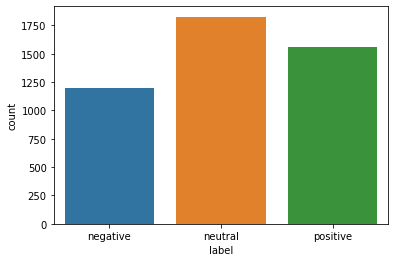

In [17]:
sns.countplot(df['label'])

In [18]:
df

,VIDEO: Gulabrao Patil | Koronakalata not right Khadse-Mahajan tikatippani: Gulabrao Patil\n #GulabraoPatil # Corona ... https://t.co/iyKXsINMHU,clean_tweets,Score,neg,pos,label
0,"Corona: Corona, but the new strain of origin a...",corona corona new strain origin amaravatituna ...,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",0.13,0.00,negative
1,"Corona Vaccine Update: US expert said, kovida ...",corona vaccine update us expert said kovida co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
2,Hundreds of new Parliament's work in strict lo...,hundreds new parliaments work strict lockdown ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
3,"Corona Disaster: No doctor, no oxygen ... Delh...",corona disaster doctor oxygen delhi hospitals ...,"{'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'comp...",0.41,0.00,negative
4,# 20 in Nashik district vaccination centers we...,nashik district vaccination centers vaccinated...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
...,...,...,...,...,...,...
4576,# Vasai - Virar City Municipal Center for Immu...,vasai virar city municipal center immunization...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
4577,US: Johnson & Johnson kovida vaccine for immun...,us johnson johnson kovida vaccine immunization,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
4578,District I started tops Pulse Polio Immunizati...,district started tops pulse polio immunization...,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.00,0.29,positive
4579,Kovida -19 vaccination camp held https://t.co/...,kovida vaccination camp held,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral


In [19]:
df['clean_tweets']

0       corona corona new strain origin amaravatituna ...
1       corona vaccine update us expert said kovida co...
2       hundreds new parliaments work strict lockdown ...
3       corona disaster doctor oxygen delhi hospitals ...
4       nashik district vaccination centers vaccinated...
                              ...                        
4576    vasai virar city municipal center immunization...
4577      us johnson johnson kovida vaccine immunization 
4578    district started tops pulse polio immunization...
4579                         kovida vaccination camp held
4580    corona vaccine vaccination camp teacher uma ka...
Name: clean_tweets, Length: 4581, dtype: object

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
X=df['clean_tweets']
y=df['label']
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
print('shape of x',X.shape)
clf=LinearSVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

shape of x (4581, 6262)
              precision    recall  f1-score   support

    negative       0.96      0.85      0.90       239
     neutral       0.89      0.96      0.93       366
    positive       0.95      0.94      0.95       312

    accuracy                           0.93       917
   macro avg       0.93      0.92      0.93       917
weighted avg       0.93      0.93      0.93       917



In [26]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict=rf.predict(X_test)
accuracy_score(y_test,predict)


0.9312977099236641

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predict=dt.predict(X_test)
accuracy_score(y_test,predict)

0.9323882224645583

In [48]:

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(X_train,y_train)
log_predictions = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[184,  44,  11],
       [  6, 354,   6],
       [  3,  38, 271]])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)*100

93.23882224645584